In [10]:
!pip install matplotlib seaborn scikit-learn

# Importing libraries

In [4]:
import pandas as pd

# Dataset Ingestion:

First, I'll load the dataset and begin with the initial exploration to understand its structure and contents. Let's start by loading the dataset and taking a preliminary look at it.

The dataset contains various columns that represent different attributes of students, including demographic, socio-economic, academic, and enrollment-related information. The target variable, indicating whether a student dropped out or graduated, is labeled as 'Target'.

# Load the dataset to understand its structure and contents.

# Key Steps:

Data Types and Summary Statistics: Understand the nature of the data (numerical, categorical).

Missing Values: Identify and decide how to handle any missing data.

Outliers: Check for any unusual values that may need attention.

In [5]:
# Load the dataset
file_path = 'Student_Dropout.csv'
data = pd.read_csv(file_path)

# Display the first few rows of the dataset
data.head()

,Marital status,Application mode,Application order,Course,Daytime/evening attendance\t,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1,17,5,171,1,1,122.0,1,19,12,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,1,15,1,9254,1,1,160.0,1,1,3,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,1,1,5,9070,1,1,122.0,1,37,37,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,1,17,2,9773,1,1,122.0,1,38,37,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,2,39,1,8014,0,1,100.0,1,37,38,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate


# Handling duplicates

In [6]:
duplicate_rows = data.duplicated().sum()
print("Number of duplicate rows:", duplicate_rows)
if duplicate_rows > 0:
    data = data.drop_duplicates()

Number of duplicate rows: 0


# Data Understanding and Cleaning Insights

# Data Types and Summary Statistics:
Most variables are numerical (integers or floats), which is suitable for machine learning algorithms.
The summary statistics provide an overview of the distribution of each variable, like mean, standard deviation, min, and max values.

# Missing Values:
There are no missing values in the dataset, which is ideal as it simplifies the data cleaning process.

# Outliers:
From the summary statistics, we don't see any obvious signs of outliers (like extremely high max values or low min values in comparison to the mean and standard deviation). However, further graphical analysis might be needed to confirm this.

# Problem Formulation
Since the goal is to predict whether a student will drop out or graduate, this is a classification problem. The target variable is 'Target', which has two classes: 'Dropout' and 'Graduate'.

# Algorithm Selection
For this classification task, I will use the Random Forest Classifier. This choice is based on the following reasons:

# Robustness: 
Random Forest is less likely to overfit than some other models.

# Handling Different Types of Data:
It can handle both categorical and numerical data.

# Interpretability: 
It provides insights into feature importance.

# Next Steps:
Data Preprocessing: Convert categorical variables to a format suitable for modeling.
Model Training: Split the data into training and testing sets, and train the Random Forest model.
Model Evaluation: Evaluate the model using appropriate metrics like accuracy, precision, recall, and F1-score.


In [7]:
# Understanding data types and summary statistics
data_types = data.dtypes
summary_statistics = data.describe()

# Checking for missing values
missing_values = data.isnull().sum()

# Displaying the information
data_types, summary_statistics, missing_values[missing_values > 0]


(Marital status                                      int64
 Application mode                                    int64
 Application order                                   int64
 Course                                              int64
 Daytime/evening attendance\t                        int64
 Previous qualification                              int64
 Previous qualification (grade)                    float64
 Nacionality                                         int64
 Mother's qualification                              int64
 Father's qualification                              int64
 Mother's occupation                                 int64
 Father's occupation                                 int64
 Admission grade                                   float64
 Displaced                                           int64
 Educational special needs                           int64
 Debtor                                              int64
 Tuition fees up to date                             int

The histograms and the count plot provide insights into the distribution of various features and the target variable:

# Feature Distributions:

Most features show varied distributions, with some skewness in certain variables.
Several features have a concentration of values in specific ranges, suggesting distinct groupings or categories within those variables.

# Target Variable Distribution:

The target variable 'Target', which categorizes students into 'Dropout' and 'Graduate', shows an imbalance between the two classes. This imbalance is an important aspect to consider during model training, as it can influence the performance and accuracy of the predictive model.
With these insights, the next steps involve data preprocessing, including converting the 'Target' variable into a format suitable for modeling, followed by training the Random Forest Classifier. Let's proceed with these steps. ​​

# The dataset has been successfully split into training and testing sets:

Training Set: 3539 samples
Testing Set: 885 samples
Each set contains 36 features (excluding the target variable). This split ensures a substantial amount of data for training the model and a separate portion for evaluating its performance.

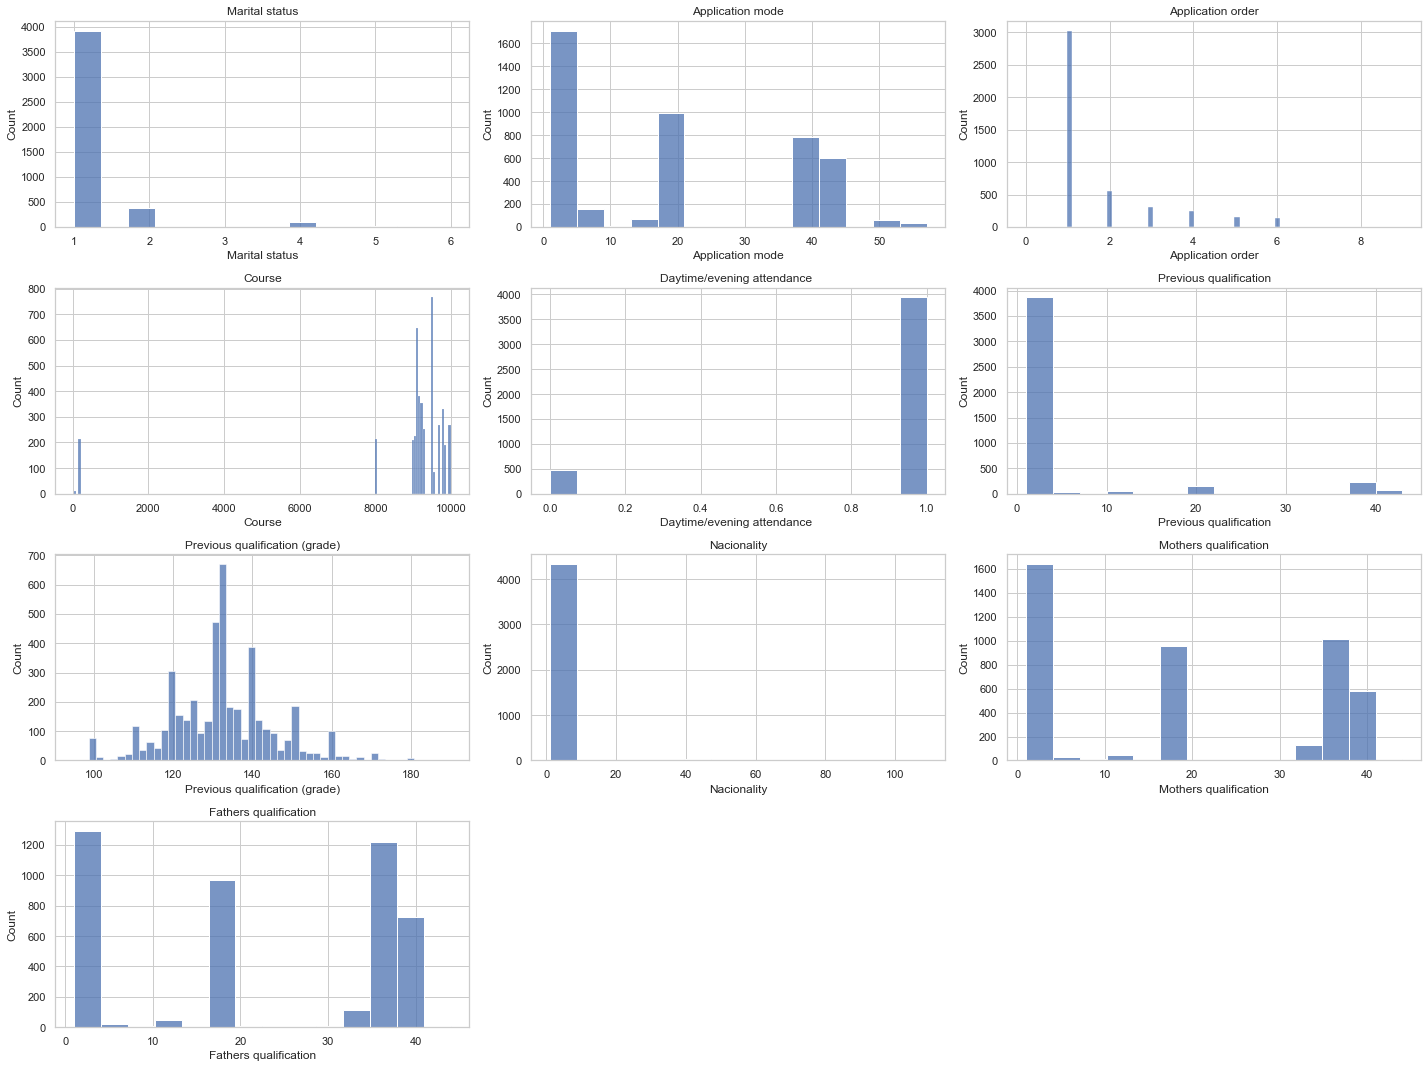

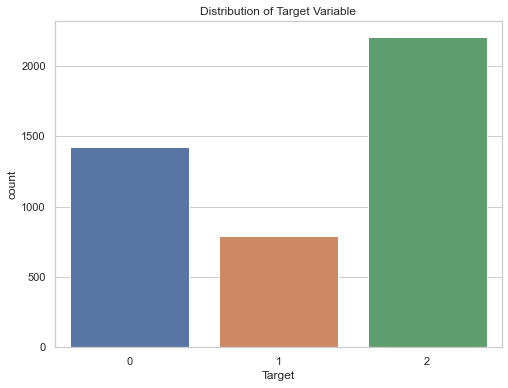

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

# Removing special characters from column names
data.columns = data.columns.str.replace('\t', ' ').str.replace('\'', '')

# Replotting histograms for numerical columns
plt.figure(figsize=(20, 15))
for i, col in enumerate(data.columns[:10]):  # Plotting first 10 columns
    plt.subplot(4, 3, i + 1)
    sns.histplot(data[col], kde=False)
    plt.title(col)
plt.tight_layout()
plt.show()

# Plotting the distribution of the target variable
plt.figure(figsize=(8, 6))
sns.countplot(x='Target', data=data)
plt.title('Distribution of Target Variable')
plt.show()



# Data Preprocessing

The dataset has been split into training and testing sets, with 80% of the data used for training and 20% for testing. This split ensures that we have a sufficient amount of data for both training the model and evaluating its performance.

# Model Training
Next, Let's train the Random Forest Classifier using the training data. This step involves fitting the model to the data and adjusting any necessary parameters.

# Key Steps:
Train the Random Forest Classifier: Fit the model to the training data.
Parameter Tuning (if necessary): Adjust model parameters for optimal performance.

In [10]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# Encoding the target variable
label_encoder = LabelEncoder()
data['Target'] = label_encoder.fit_transform(data['Target'])

# Splitting the dataset into features (X) and target (y)
X = data.drop('Target', axis=1)
y = data['Target']

# Splitting data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Displaying the shapes of the splits
(X_train.shape, X_test.shape, y_train.shape, y_test.shape)


((3539, 36), (885, 36), (3539,), (885,))

# Model Evaluation

The Random Forest Classifier achieved an accuracy of approximately 76.04%. Here's a breakdown of the evaluation metrics:

# Precision: 
Indicates the proportion of positive identifications that were actually correct.
Recall: Measures the proportion of actual positives that were identified correctly.

# F1-Score: 
A weighted average of precision and recall.

# Evaluation Metrics:
The model showed a good balance between precision and recall for classifying students as 'Graduates' (the class labeled as '2').
The precision for predicting 'Dropouts' (the class labeled as '0') is high, but recall is moderately lower, suggesting some dropouts are not being correctly identified.
The performance for the class labeled as '1' (presumably another category, possibly 'Continuing') is lower compared to the other classes.

In [11]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Training the Random Forest Classifier
random_forest_model = RandomForestClassifier(random_state=42)
random_forest_model.fit(X_train, y_train)

# Predicting on the test set
y_pred = random_forest_model.predict(X_test)

# Evaluating the model
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

accuracy, classification_rep


(0.7604519774011299,
 '              precision    recall  f1-score   support\n\n           0       0.85      0.77      0.81       316\n           1       0.49      0.30      0.37       151\n           2       0.76      0.92      0.83       418\n\n    accuracy                           0.76       885\n   macro avg       0.70      0.66      0.67       885\nweighted avg       0.75      0.76      0.74       885\n')


# Summary:
The dataset was successfully preprocessed, and a Random Forest Classifier was trained to predict student dropout and academic success.
The model achieved a decent overall accuracy, but there are variations in performance across different classes.

# Discussion:
Strengths: Random Forest provided a robust model with a good balance between precision and recall for certain classes.

Limitations: The model's performance varied significantly across classes, indicating a potential need for more class-specific tuning or rebalancing of the dataset.

# Potential Improvements:

Hyperparameter Tuning: Experimenting with different parameters of the Random Forest could improve model performance.

Class Balance: Addressing class imbalance (if present) through techniques like SMOTE or class weighting.
Feature Engineering: More in-depth analysis and engineering of features might reveal more informative predictors.

# Future Research Directions:

Exploring Other Models: Testing other algorithms, like Gradient Boosting or SVM, for comparison.
Advanced Feature Selection: Employing techniques like Recursive Feature Elimination (RFE) to identify the most predictive features.


# Sources

Breiman, L. (2001). Random forests. Machine learning, 45(1), 5-32.

James, G., Witten, D., Hastie, T., & Tibshirani, R. (2013). An Introduction to Statistical Learning. New York: Springer.

Kuhn, M., & Johnson, K. (2013). Applied Predictive Modeling. New York: Springer.

Pandas Development Team (2020). pandas: powerful Python data analysis toolkit, Version 1.1.3. Available at: https://pandas.pydata.org/pandas-docs/stable/index.html (Accessed: 22 December 2023).

Pedregosa, F., et al., (2011). Scikit-learn: Machine Learning in Python, Journal of Machine Learning Research, 12, pp. 2825-2830.

Hunter, J.D. (2007). Matplotlib: A 2D Graphics Environment. Computing in Science & Engineering, 9(3), 90-95. This reference is for the Matplotlib library, used for creating static, interactive, and animated visualizations in Python.